In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import camb
from camb import model, initialpower
from classy import Class
from camb.dark_energy import DarkEnergyEqnOfState, EarlyQuintessence


In [ ]:
#### CLASS LCDM PARAMS ####

LCDM_class_settings = {'output':'tCl,pCl,lCl,mPk',
                   'lensing':'yes',
                   'h':0.6821,
                   'omega_b':0.02253,
                   'omega_cdm':0.1177,
                   'A_s':2.216e-9, 
                   'n_s':0.9686,
                   'tau_reio':0.085,
                   'm_ncdm': 0.06,
                   'N_ncdm':1, 
                   'N_ur':2.0328,
                   'l_max_scalars':5000,
                   'non linear': 'halofit',
                   'accurate_lensing':1,
                   'num_mu_minus_lmax' : 1000.,
                   'delta_l_max' : 1000.,
}


LCDM_class = Class()
LCDM_class.set(LCDM_class_settings)
LCDM_class.compute()


In [22]:
#### CLASS LCDM SPECTRA ####

clLCDM_class=LCDM_class.lensed_cl()
clell_class = clLCDM_class.get("ell")
clTTLCDM_class = clLCDM_class.get("tt")
clEELCDM_class = clLCDM_class.get("ee")
clTELCDM_class = clLCDM_class.get("te")


DellTTLCDM_class = np.multiply(np.multiply(clell_class,clell_class+1),clTTLCDM_class) * (1e6 * 2.7255)**2 / (2*np.pi)
DellTELCDM_class = np.multiply(np.multiply(clell_class,clell_class+1),clTELCDM_class) * (1e6 * 2.7255)**2 / (2*np.pi)
DellEELCDM_class = np.multiply(np.multiply(clell_class,clell_class+1),clEELCDM_class) * (1e6 * 2.7255)**2 / (2*np.pi)


In [10]:
LMAX = clell_class.shape[0] -1
LMAX=5000

In [25]:
#### CAMB LCDM PARAMS ####

pars_LCDM_camb = camb.CAMBparams()
pars_LCDM_camb.set_cosmology(H0=68.21, ombh2=0.02253, omch2=0.1177, mnu=0.06, omk=0, tau=0.085, standard_neutrino_neff=3.046)
pars_LCDM_camb.InitPower.set_params(As=2.216e-9, ns=0.9686, r=0)
pars_LCDM_camb.NonLinear = model.NonLinear_both
pars_LCDM_camb.NonLinearModel.set_params('mead2016', HMCode_A_baryon = 3.13, HMCode_eta_baryon = 0.603)
pars_LCDM_camb.set_for_lmax(5000, lens_potential_accuracy=4, lens_margin=2050)
pars_LCDM_camb.set_accuracy(AccuracyBoost=2.0, lSampleBoost=2.0, lAccuracyBoost=2.0,DoLateRadTruncation=False)
results_LCDM_camb = camb.get_results(pars_LCDM_camb)



In [26]:
#### CAMB LCDM SPECTRA ####
powers_LCDM_camb = results_LCDM_camb.get_cmb_power_spectra(pars_LCDM_camb, CMB_unit='muK')
clLCDM_camb = powers_LCDM_camb['lensed_scalar']
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
clell_camb = np.arange(clell_class.shape[0])
clTTLCDM_camb = clLCDM_camb[:LMAX+1,0]
clEELCDM_camb = clLCDM_camb[:LMAX+1,1]
clTELCDM_camb = clLCDM_camb[:LMAX+1,3]


DellTTLCDM_camb = 1e12*np.multiply(np.multiply(clell_camb,clell_camb+1),clTTLCDM_camb)/(2*3.14)
DellTELCDM_camb = 1e12*np.multiply(np.multiply(clell_camb,clell_camb+1),clTELCDM_camb)/(2*3.14)
DellEELCDM_camb = 1e12*np.multiply(np.multiply(clell_camb,clell_camb+1),clEELCDM_camb)/(2*3.14)


<ipython-input-28-d50596c915a3>:27: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(clell_camb,(DellTTLCDM_class-clTTLCDM_camb)/clTTLCDM_camb*100,c='k',lw=2.)


Text(0, 0.5, '$ \\left(D_\\ell ^{\\rm TT LCDM, CLASS} - D_\\ell ^{\\rm TT LCDM, CAMB} \\right) ~ \\left/ ~ D_\\ell ^{\\rm TT LCDM, CAMB} \\right.$')

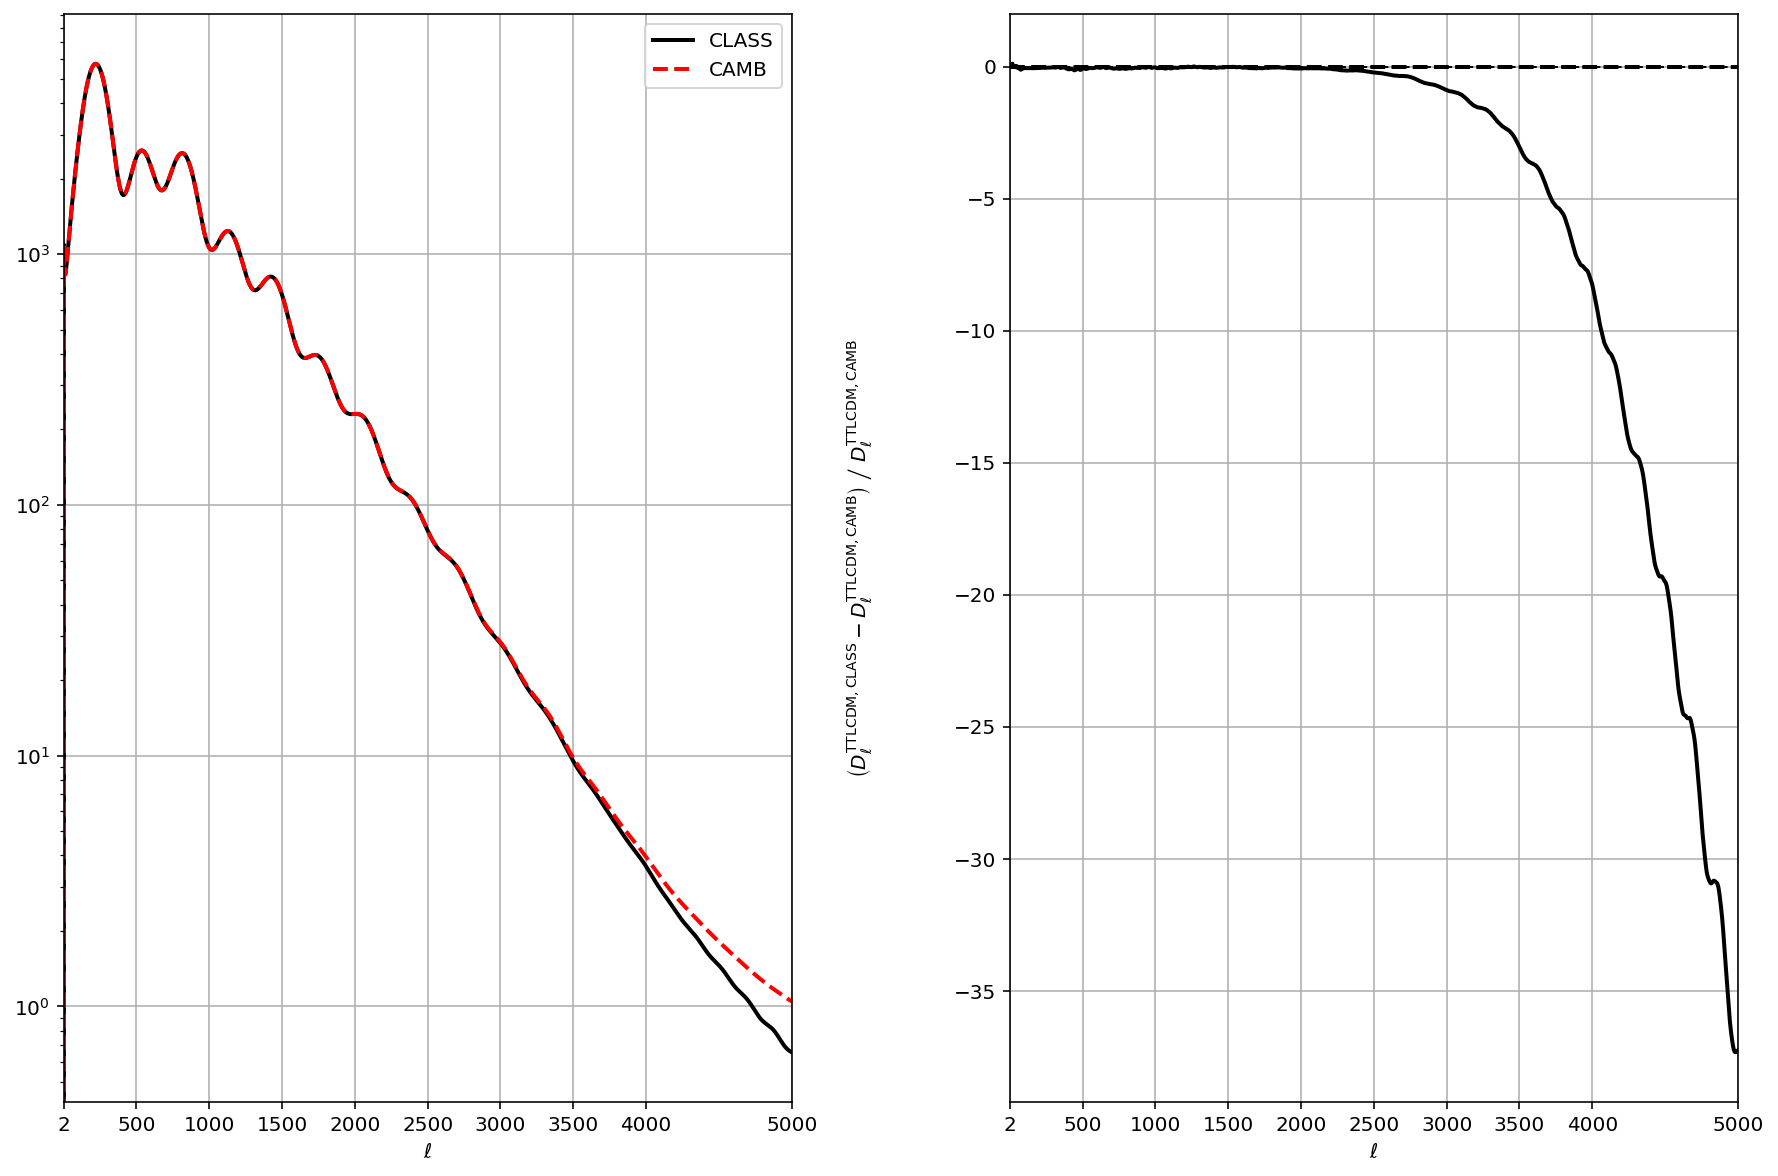

In [28]:
#### COMPARISON OF LCDM SPECTRA ####

pos = [2,500,1000,1500,2000,2500,3000,3500,4000,5000]

matplotlib.axis.YAxis.OFFSETTEXTPAD = 25

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

ax1.grid()
ax1.plot(clell_camb,DellTTLCDM_class,c='k',lw=2., label = 'CLASS')
ax1.plot(clell_camb,clTTLCDM_camb,c='r', ls = 'dashed', lw=2., label = 'CAMB')
ax1.set_yscale('log')
ax1.set_xlim([2,5000])
ax1.legend(loc = 'best')

# ax1.set_ylim([1e0,1e3])
ax1.set_xticks(pos)
ax1.set_xticklabels(pos)
ax1.set_xlabel(r'$\ell$')
ax2.set_ylabel(r'$ \left(D_\ell ^{\rm TT}$',labelpad=40)#,fontsize=2LASSax1.legend()
ax2.grid()
ax2.set_xlim([2,5000])
# ax2.set_ylim([-0.01,0.015])
# ax2.ticklabel_format(style='sci', axis='y', sEElimits=(0,0))
ax2.axhline(0,c='k',lw=1,ls='--')
ax2.plot(clell_camb,(DellTTLCDM_class-clTTLCDM_camb)/clTTLCDM_camb*100,c='k',lw=2.)
ax2.axhline(0,c='k',lw=2,ls='--')
ax2.set_xticks(pos)
ax2.set_xticklabels(pos)
# ax2.set_ylim([-1,1])
ax2.set_xlabel(r'$\ell$')
ax2.set_ylabel(r'$ \left(D_\ell ^{\rm TT LCDM, CLASS} - D_\ell ^{\rm TT LCDM, CAMB} \right) ~ \left/ ~ D_\ell ^{\rm TT LCDM, CAMB} \right.$',labelpad=40)#,fontsize=25)
# plt.savefig('../figures/CAMB-CLASS_TT.pdf')